In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size':16})

In [3]:
k_vals = [0.1, 0.01, 0.001]

data = []
for k in k_vals:
    data.append(np.loadtxt(f"../data/perturbations_k{k}.txt"))
data = np.array(data)

x          = data[0,:,0]
delta_cdm  = data[:,:,1]
delta_b    = data[:,:,2]
v_cdm      = data[:,:,3]
v_b        = data[:,:,4]
Theta0     = data[:,:,5]
Theta1     = data[:,:,6]
Theta2     = data[:,:,7]
Theta3     = data[:,:,8]
Phi        = data[:,:,9]
Psi        = data[:,:,10]
Pi         = data[:,:,11]
source     = data[:,:,12]

data.shape

(3, 5000, 16)

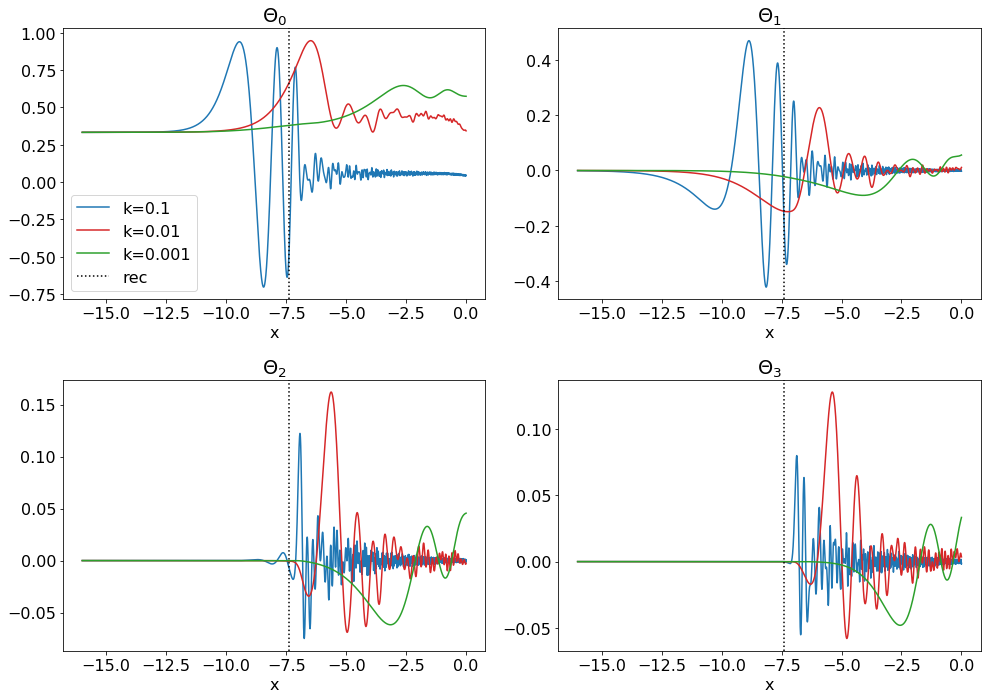

In [18]:
colors = ["tab:blue", "tab:red", "tab:green"]

fig, ax = plt.subplots(2, 2, figsize=(14,10))
for i, k in enumerate(k_vals):
    ax[0,0].plot(x, Theta0[i], c=colors[i], label=f"k={k}")
    ax[0,0].set_title(r"$\Theta_0$")

    ax[0,1].plot(x, Theta1[i], c=colors[i])
    ax[0,1].set_title(r"$\Theta_1$")

    ax[1,0].plot(x, Theta2[i], c=colors[i])
    ax[1,0].set_title(r"$\Theta_2$")

    ax[1,1].plot(x, Theta3[i], c=colors[i])
    ax[1,1].set_title(r"$\Theta_3$")

for i in range(2):
    for j in range(2):
        ax[i,j].set_xlabel("x")
        ax[i,j].axvline(x=-7.4, ls=":", c="k", label="rec")
        
ax[0,0].legend()
fig.tight_layout();
plt.savefig("../m3_figs/thetas.png", bbox_inches="tight")

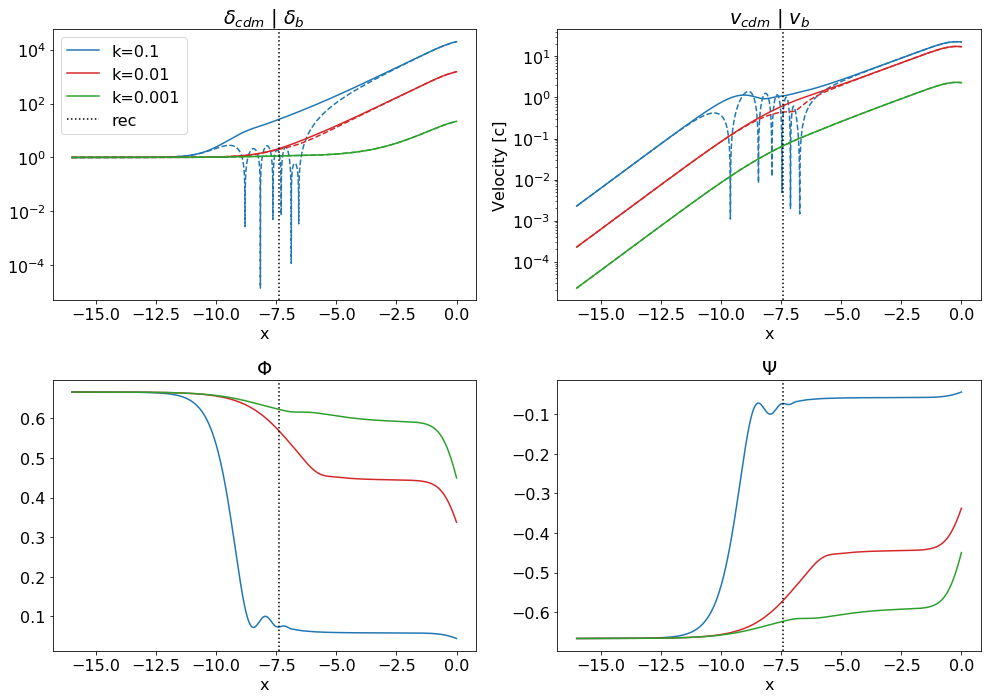

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(14,10))
for i, k in enumerate(k_vals):
    ax[0,0].semilogy(x, np.abs(delta_cdm[i]), c=colors[i], label=f"k={k}")
    ax[0,0].semilogy(x, np.abs(delta_b[i]), c=colors[i], ls="--")
    ax[0,0].set_title("$\delta_{cdm}$ | $\delta_b$")
    
    ax[0,1].semilogy(x, np.abs(v_cdm[i]), c=colors[i])
    ax[0,1].semilogy(x, np.abs(v_b[i]), c=colors[i], ls="--")
    ax[0,1].set_title("$v_{cdm}$ | $v_b$")    
    
    ax[1,0].plot(x, Phi[i], c=colors[i])
    ax[1,0].set_title("$\Phi$")

    ax[1,1].plot(x, Psi[i], c=colors[i])
    ax[1,1].set_title("$\Psi$")

for i in range(2):
    for j in range(2):
        ax[i,j].set_xlabel("x")
        ax[i,j].axvline(x=-7.4, ls=":", c="k", label="rec")

ax[0,1].set_ylabel(f"Velocity [c]")
ax[0,0].legend()
fig.tight_layout();
plt.savefig("../m3_figs/pertubations.png", bbox_inches="tight")

(-8, -6)

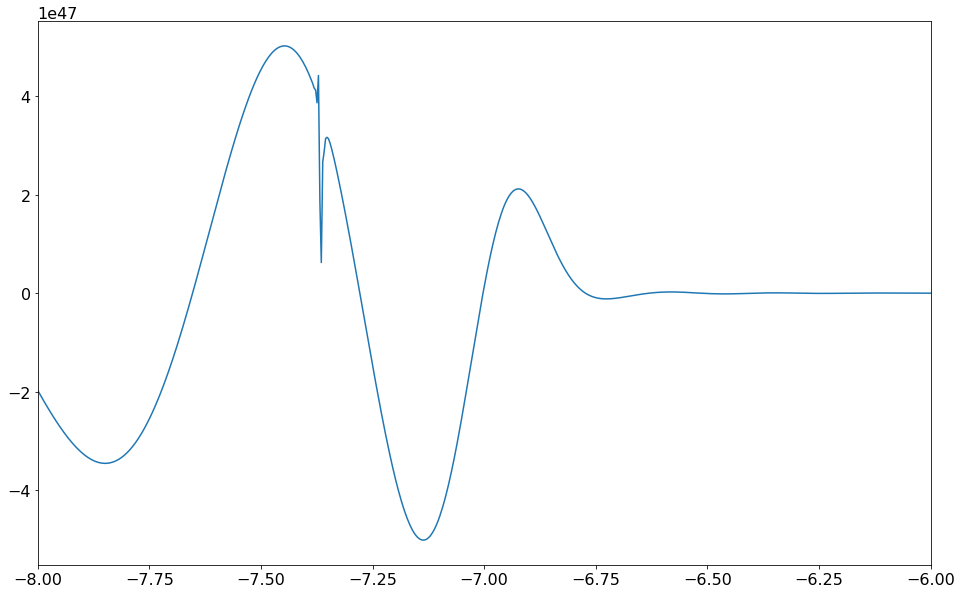

In [16]:
plt.figure(figsize=(16, 10))
plt.plot(x, source[0])
plt.xlim(-8, -6)